<a href="https://colab.research.google.com/github/karsarobert/MachineLearning2025/blob/main/PTE_ML10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 10. Gyakorlat: Naive Bayes módszer, természetes nyelv feldolgozás NLP
### 2025. november 17.

#Naive Bayes megértése
A Naive Bayes osztályozót általában szöveges adatok osztályozására használják. A következő szakaszokban megnézzük a különböző változatait, és megtanuljuk, hogyan konfigurálhatjuk a paramétereiket. De először is, hogy megértsük a Naive Bayes osztályozót, először is át kell tekintenünk Thomas Bayes tételét, amelyet a 18. században publikált.

## **Valószínűségek és a Bayes-tétel szemléletes bevezetése**

### **Gyakoriság és valószínűség: alapfogalmak**

A **gyakoriság** azt fejezi ki, hogy egy esemény hányszor következik be egy adott számú kísérlet során. Például, ha tízszer dobunk egy dobókockával, és háromszor hatost kapunk, akkor a „hatost dobunk” esemény gyakorisága 3.

A **relatív gyakoriság** a gyakoriság aránya az összes kísérlet számához képest. Az előbbi példában:  
$$
\text{Relatív gyakoriság} = \frac{3}{10} = 0{,}3
$$
Ez azt jelzi, hogy a tíz kísérletből három alkalommal következett be az esemény, azaz az esetek 30%-ában.

A **valószínűség** egy esemény hosszú távú viselkedését írja le. Ha a dobókockás kísérletet sokszor megismételjük, például 10 000-szer, akkor a „hatost dobunk” esemény relatív gyakorisága egyre közelebb kerül az elméleti valószínűséghez, ami ebben az esetben:  
$$
P(\text{hatos}) = \frac{1}{6} \approx 0{,}167
$$
Ezt nevezzük **klasszikus valószínűségnek**. Fontos megjegyezni, hogy a valószínűség nem pusztán a tapasztalaton alapul, hanem gyakran elméleti vagy statisztikai modellekből számítjuk.

---

### **Előzetes és feltételes valószínűség**

Tegyük fel, hogy egy osztályozási problémával állunk szemben, például egy e-mailt szeretnénk besorolni „spam” vagy „nem spam” kategóriába.

- Az **előzetes valószínűség** (prior probability), például $$ P(\text{spam}) $$, azt mutatja meg, hogy az összes eddig ismert (pl. tanító) e-mail közül milyen arányban volt spam. Ez független az új üzenet tartalmától, tisztán a korábbi tapasztalatokon alapul.

- A **feltételes valószínűség** $$ P(\text{szó = „ingyen”} \mid \text{spam}) $$ azt fejezi ki, hogy ha egy üzenet spam, akkor mekkora az esélye, hogy tartalmazza az „ingyen” szót. Ez már összekapcsol két eseményt: az osztályt és a megfigyelt jellemzőt.

Egy klasszikus dobókockás példával:  
- Legyen **A** az az esemény, hogy **hatost** dobunk.  
- Legyen **B** az az esemény, hogy **páros számot** dobunk (2, 4, 6).

Ekkor:  
$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)} = \frac{1/6}{3/6} = \frac{1}{3}
$$
Azaz, ha tudjuk, hogy párosat dobtunk, akkor az esély arra, hogy ez hatos volt, 1/3.

---

### **Mi a célunk? – Az utólagos valószínűség**

Amikor egy új e-mailt szeretnénk besorolni, nem az a kérdés, hogy milyen gyakran volt spam az adatbázisban, hanem **mekkora az esélye annak, hogy ez az adott új e-mail spam**, a tartalma (például bizonyos szavak előfordulása) alapján.

Ezt nevezzük **utólagos valószínűségnek** (posterior probability):  
$$
P(\text{spam} \mid \text{szó = „ingyen”})
$$

---

### **A Bayes-tétel szerepe**

Az utólagos valószínűség számítása nem mindig egyszerű. Itt jön képbe a **Bayes-tétel**, amely lehetővé teszi, hogy az ismert előzetes és feltételes valószínűségekből kiszámoljuk az ismeretlen utólagos valószínűséget:
$$
P(y \mid x) = \frac{P(x \mid y) \cdot P(y)}{P(x)}
$$
Ahol:
- $$ P(y) $$: az adott osztály előzetes valószínűsége (pl. „spam” aránya),
- $$ P(x \mid y) $$: a jellemzők valószínűsége az adott osztály esetén (pl. „ingyen” szó gyakorisága spam levelekben),
- $$ P(x) $$: a jellemzők összesített valószínűsége az összes adatban (pl. milyen gyakran fordul elő az „ingyen” szó általában).

---

### **Szemléletes összefoglalás**

A Bayes-tétel tehát egy „irányváltásra” ad lehetőséget: ha tudjuk, hogy adott osztály (pl. spam) esetén milyen valószínűséggel fordul elő egy jellemző (pl. „ingyen” szó), akkor ebből visszakövetkeztethetünk arra, hogy **egy új e-mail a jellemzők alapján mennyire valószínű, hogy spam**.

Ez a logika az alapja a **Bayes-féle osztályozóknak**, amelyeket széles körben alkalmazunk a gépi tanulásban, például szövegfeldolgozásban, e-mail szűrésben, diagnosztikában és még sok más területen.

---

Szükség esetén szívesen kiegészítem példákkal vagy ábrával is. Szeretnél egy konkrét példát is egy osztályozási feladatra Bayes-tétellel?



#A Bayes-szabály
Bayesi osztályozás
A Naive Bayes osztályozók a Bayes-féle osztályozási módszerekre épülnek. Ezek a Bayes-tételre támaszkodnak, amely egy olyan egyenlet, amely statisztikai mennyiségek feltételes valószínűségeinek kapcsolatát írja le. A Bayes-osztályozásban egy címke valószínűségét keressük néhány megfigyelt jellemző alapján, amit $P(L~|~{\rm features})$ -ként írhatunk le. A Bayes-tétel megmondja, hogyan fejezhetjük ki ezt olyan mennyiségek formájában, amelyeket közvetlenebbül tudunk kiszámítani:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$



Ha két címke között próbálunk dönteni - nevezzük őket L1-nek és L2-nek -, akkor a döntés egyik módja az, hogy kiszámítjuk az egyes címkékre vonatkozó utólagos valószínűségek arányát:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

Most már csak egy modellre van szükségünk, amellyel kiszámíthatjuk a $P({\rm features}~|~L_i)$ értéket minden egyes címkére. Az ilyen modellt generatív modellnek nevezzük, mert meghatározza azt a hipotetikus véletlen folyamatot, amely az adatokat generálja. Ennek a generatív modellnek a megadása minden egyes címkére az ilyen Bayes-osztályozó képzésének fő része. Az ilyen képzési lépés általános változata nagyon nehéz feladat, de egyszerűsíthetjük azt a modell formájára vonatkozó néhány egyszerűsítő feltevés alkalmazásával.

Itt jön be a "naiv" a "naiv Bayes"-ben: ha nagyon naiv feltételezéseket teszünk az egyes címkék generatív modelljével kapcsolatban, akkor minden egyes osztályhoz megtalálhatjuk a generatív modell durva közelítését, és ezután folytathatjuk a Bayes-osztályozást. A naiv Bayes-osztályozók különböző típusai különböző naiv feltételezéseken alapulnak az adatokkal kapcsolatban, és ezek közül a következő szakaszokban néhányat megvizsgálunk.


#Példa
Egy gyárban anyaghibás és méterhibás gyártmányok is készülnek,
és ezek a teljes mennyiség 25 illetve 40 százalékát teszik ki. A mérethibás
darabok ötöde anyaghibás is egyben. Az anyaghibás gyártmányos mekkora
hányada mérethibás?

$$
P(mérethibás~|~{\rm anyaghibás}) = \frac{P({\rm anyaghibás}~|~mérethibás)P(mérethibás)}{P({\rm anyaghibás})} = \frac{0,2 * 0,4}{0,25} = 0,32
$$

## A valószínűség „naiv” kiszámítása

Egy adatpont (például egy mondat) általában **több jellemzőből** épül fel: szókból, tokenekből, mérési értékekből stb.
Ezért a valószínűség, amit ténylegesen meg akarunk határozni:

$
P(x \mid y) = P(x_1, x_2, \ldots, x_k \mid y)
$

ahol

* **x₁, x₂, …, xₖ** az egyes jellemzők (pl. szavak),
* **y** a célcímke (pl. „Igen” vagy „Nem”).

### Mi a gond ezzel?

Elméletben ki kellene számolnunk **minden lehetséges kombináció** valószínűségét:

* „Szeretem + az + almát”
* „Utálom + a + körtét”
* „Szeretem + a + narancsot”

…és így tovább.

De a valóságban **szinte soha nem látjuk ugyanazt a teljes kombinációt** kétszer.
Ezért a modell **nem tud általánosítani**, és szinte minden új mondatra azt mondaná:


> „Ezt még soha nem láttam, tehát a valószínűsége 0.”

Erre mutassunk egy konkrét példát.

---

## Példa: felismerjük-e, hogy a szerző szereti a gyümölcsöt?

Képzési adatok:

| Mondat               | y (szereti-e a gyümölcsöt?) |
| -------------------- | --------------------------- |
| Szeretem az almát    | Igen                        |
| Szeretem a narancsot | Igen                        |
| Utálom a körtét      | Nem                         |

Most érkezik egy új mondat:

**„Utálom az almát.”**

### A probléma:

A kombináció „Utálom + az + almát” **sosem fordult elő a képzésben**, így a klasszikus feltételes valószínűség-alapú modell:

$
P(\text{"Utálom az almát"} \mid y)
$

nagyon egyszerűen **0**-nak venni.

Pedig a szavakat *külön-külön* már mind láttuk:

* „Utálom” → már szerepelt
* „az” → többször is
* „almát” → szerepelt

### De a régi (nem naiv) képlet nem foglalkozik azzal, hogy:

**„a mondat darabjai is hordoznak információt”**
→ csak a teljes kombináció számít.

---

## A Naiv Bayes trükkje: feltételezzük, hogy minden szó független

Ezzel a megközelítéssel:

$
P(x_1, x_2, x_3 \mid y) \approx P(x_1 \mid y)\cdot P(x_2 \mid y)\cdot P(x_3 \mid y)
$

Azaz:

* nem kell látnunk a *teljes mondatot*
* elég, ha minden egyes szót láttunk már külön
* így már tudunk valamit mondani az új mondatról is

Ez a **függetlenségi feltételezés** természetesen nem igaz a valóságban (a szavak nem függetlenek!) — de:

### mégis működik, mert sokkal jobban általánosít

ÉS

### nem omlik össze, ha új szókombinációt kap

Ezért nevezzük ezt a modellt:

> **Naiv** Bayes osztályozónak
> (mert a függetlenség feltételezése „naiv”, de gyakorlati szempontból rendkívül hasznos)

---

## Összefoglalás

* A teljes kombinációk alapján számolt valószínűségekhez **rengeteg adat** kellene.
* A Naiv Bayes azzal egyszerűsíti a problémát, hogy **minden jellemzőt függetlennek feltételez**.
* Ennek köszönhetően már akkor is tudunk következtetni egy mondatra, ha azt **sosem láttuk korábban**, csak az alkotó szavait.

## **Példa – Rákszűrés és Bayes-tétel**

Képzeljük el, hogy egy orvos 10 000 emberrel végez rákszűrést, és az alábbi eredmények születnek:

|                   | **Rákos** | **Nem rákos** | **Összes** |
| ----------------- | --------- | ------------- | ---------- |
| **Pozitív teszt** | 80        | 900           | 980        |
| **Negatív teszt** | 20        | 9000          | 9020       |
| **Összesen**      | 100       | 9900          | 10000      |

A táblázat alapján:

* A 100 rákos emberből **80-at helyesen** jelzett a teszt (pozitív).
* A 9900 egészséges emberből **900-at tévesen** pozitívnak minősített.

Most tegyük fel a kérdést:

### **Ha valaki pozitív teszteredményt kap, mennyi az esélye, hogy valóban rákos?**

Jelölések:

* **C** = rákos
* **Pos** = pozitív teszteredmény

Számoljuk ki a szükséges valószínűségeket:

* $ P(Pos \mid C) = 80/100 = 0.8 $
  (A teszt 80%-ban találja el a rákosokat.)
* $ P(C) = 100/10000 = 0.01 $
  (A rák előfordulása a populációban 1%.)
* $ P(Pos) = 980/10000 = 0.098 $
  (Összes pozitív arány a teljes mintában.)

Bayes-tétel:

$
P(C \mid Pos) = \frac{P(Pos \mid C) \cdot P(C)}{P(Pos)}$

Behelyettesítés:

$
P(C \mid Pos) = \frac{0.8 \cdot 0.01}{0.098} \approx 0.0816
$

**Ez azt jelenti, hogy egy pozitív teszt után mindössze 8,16% az esélye annak, hogy az illető valóban rákos.**

Ez jóval magasabb, mint a 1%-os alapvalószínűség — de még mindig messze nem 100%. A szűrés tehát **nagy arányban ad vakriasztást**, és a pozitív eredményt más vizsgálatokkal kell megerősíteni.

---

## **Additív simítás – Miért van rá szükség?**

A Naiv Bayes klasszifikátor feltételezi, hogy:

$
P(x_1, x_2, ..., x_k \mid y) = P(x_1 \mid y)\cdot P(x_2 \mid y)\cdot \dots
$

Ráadásul a valószínűségeket a tanító adatok alapján becsüljük.

### Probléma

Ha egy olyan kifejezés jelenik meg a predikció során, **amit korábban sosem láttunk**, akkor annak a feltételes valószínűsége:

$
P(\text{ismeretlen szó} \mid y) = 0
$

És mivel szorzunk:

➡️ **az egész számított valószínűség lenullázódik**.
A modell így hibás döntést hoz csak azért, mert egyetlen szó új.

### Megoldás: Additív simítás

Úgy teszünk, mintha minden osztály kapna *még egy fiktív dokumentumot*, amelyben **minden szó egyszer előfordulna**.

Ezt jelenti valójában: egy kis valószínűségi tömeget átcsoportosítunk a látott szavak közül a még nem látottakra.

---

## **Az alfa (α) paraméter szerepe**

Az **α** szabályozza, mekkora tömeget "kenünk szét" a szókésőn:

* **α = 1** → Laplace-simítás
* **0 < α < 1** → Lidstone-simítás

Minél nagyobb α, annál jobban „büntetjük”, ha kevés adatot láttunk – vagyis annál nagyobb részt adunk a nem látott kifejezéseknek.

---

## **Példa additív simításra**

### 1. helyzet: Sok adat

10 000 emberből 9000 kattint egy linkre → **CTR = 90%**.

### 2. helyzet: Kevés adat

1 ember látta → és kattintott → **CTR = 100%**
De ez nagyon bizonytalan becslés.

### Tegyük fel, hogy α = 1 (Laplace), vagyis

**úgy teszünk, mintha 2 extra felhasználó lenne**, akik közül az egyik kattintott.

#### Első eset:

* új számok:

  * kattintás: 9000 + 1 = 9001
  * összes: 10000 + 2 = 10002
* új arány:
  $
  \frac{9001}{10002} \approx 90%
  $

A rengeteg valódi adat miatt a simítás **alig változtat**.

#### Második eset:

* új számok:

  * kattintás: 1 + 1 = 2
  * összes: 1 + 2 = 3
* új arány:
  $
  \frac{2}{3} \approx 66%
  $

A korábbi 100% helyett egy sokkal reálisabb érték.

### Intuitív értelmezés

A Laplace/Lidstone simítás úgy működik, mintha lenne:

* egy előzetes (prior) elképzelésünk: **kb. 50% kattintás**
* kevés adat → a prior dominál
* sok adat → az adat felülírja a priort

Ez tökéletesen illeszkedik a Bayes-i gondolkodásmódhoz.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

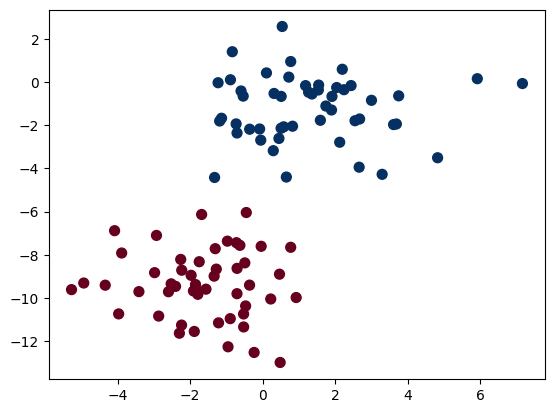

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [ ]:
rng = np.random.RandomState(0) # véletlen pontok generálása a tanítóadatok körül
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

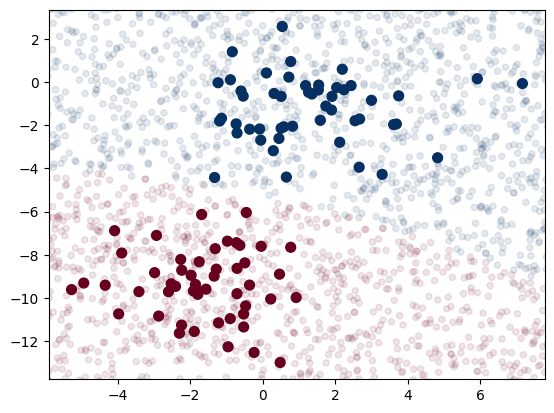

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu') #tanító adatok kirajzolása
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1) # a teszt pontok kirajzolása
plt.axis(lim);

#Szövegek feldolgozása
##Tokenizálás
Eddig az adatok, amelyekkel eddig foglalkoztunk, vagy táblázatos adatok voltak oszlopokkal, mint jellemzőkkel, vagy képi adatok pixelekkel, mint jellemzőkkel. A szöveg esetében a dolgok kevésbé egyértelműek. Mondatokat, szavakat vagy karaktereket használjunk jellemzőként? A mondatok nagyon specifikusak. Például nagyon valószínűtlen, hogy pontosan ugyanaz a mondat jelenjen meg két vagy több Wikipedia-cikkben. Ezért ha mondatokat használunk jellemzőként, akkor rengeteg olyan jellemzőt fogunk kapni, amelyek nem jól általánosíthatók.

A karakterek ezzel szemben korlátozottak. Az angol nyelvben például csak 26 betű van. Ez a kis változatosság valószínűleg korlátozza a különálló karakterek azon képességét, hogy elegendő információt hordozzanak a későbbi algoritmusok számára a kinyeréshez. Ennek eredményeképpen a legtöbb feladatban jellemzően szavakat használnak jellemzőként.

Maradjunk a szavaknál mint jellemzőknél. Végül nem akarunk a szótári szavakra szorítkozni; a Twitter hashtagek, számok és URL-ek is kivonhatók a szövegből, és feature-ként kezelhetők. Ezért használjuk inkább a token kifejezést a szó helyett, mivel az általánosabb. Azt a folyamatot, amikor egy szövegfolyamot tokenekre bontunk, tokenizálásnak nevezzük, és ezzel a következő részben fogunk megismerkedni.

https://platform.openai.com/tokenizer

#Tokenizálás string osztással
A különböző tokenizálási módszerek különböző eredményekhez vezetnek. Hogy bemutassuk ezeket a különbségeket, vegyük a következő három sornyi szöveget, és nézzük meg, hogyan tudjuk tokenizálni őket.

Itt a szövegsorokat karakterláncokként írom le, és egy listába teszem őket:

In [ ]:
lines = [
    'How to tokenize?\nLike a boss.',
    'Google is accessible via http://www.google.com',
    '1000 new followers! #TwitterFamous',
]

In [ ]:
for line in lines:
    print(line.split())

['How', 'to', 'tokenize?', 'Like', 'a', 'boss.']
['Google', 'is', 'accessible', 'via', 'http://www.google.com']
['1000', 'new', 'followers!', '#TwitterFamous']


Észreveheti, hogy az írásjelek a tokenek részeként maradtak meg. A kérdőjel a tokenize végén maradt, a pont pedig a boss-hoz csatolva maradt. A hashtag két szóból áll, de mivel nincs köztük szóköz, egyetlen tokenként maradt meg a vezető hash-jelével együtt.

Tokenizálás reguláris kifejezésekkel
A reguláris kifejezésekkel is kezelhetjük a betű- és számsorozatokat tokenekként, és a mondatainkat ennek megfelelően tagolhatjuk. Az itt használt minta, a "\w+", egy vagy több alfanumerikus karakterből vagy aláhúzásból álló sorozatra utal. A mintáink összeállításával egy reguláris kifejezés objektumot kapunk, amelyet a megfeleltetéshez használhatunk. Végül végighaladunk minden egyes soron, és a reguláris kifejezés objektumot használjuk a sorok tokenekre bontására:

In [ ]:
import re
_token_pattern = r"\w+"
token_pattern = re.compile(_token_pattern)

for line in lines:
    print(token_pattern.findall(line))

['How', 'to', 'tokenize', 'Like', 'a', 'boss']
['Google', 'is', 'accessible', 'via', 'http', 'www', 'google', 'com']
['1000', 'new', 'followers', 'TwitterFamous']


#Helyőrző használata a tokenizálás előtt
Az előző probléma megoldása érdekében dönthetünk úgy, hogy a mondatok tokenizálása előtt a számokat, URL-eket és hashtageket helyőrzővel helyettesítjük. Ez akkor hasznos, ha nem igazán érdekel minket a tartalmuk megkülönböztetése. Egy URL lehet számomra csak egy URL, függetlenül attól, hogy hová vezet. A következő függvény a bemenetet kisbetűvé alakítja, majd minden megtalált URL-t _url_ helyőrzővel helyettesít. Hasonlóképpen, a hashtageket és a számokat a megfelelő helyőrzőkké alakítja át. Végül a bemenetet a szóközök alapján felosztja, és az így kapott tokeneket adja vissza:

In [ ]:
_token_pattern = r"\w+"
token_pattern = re.compile(_token_pattern)

import re  # A reguláris kifejezések (regex) használatához szükséges modul

# A tokenek kinyerésére szolgáló minta – ez például szavakra, szimbólumokra stb. bonthatja a szöveget
token_pattern = re.compile(r"\b\w+\b")  # Ez a minta a szavakat választja ki (szóhatárok között álló alfanumerikus karaktersorozatok)

def tokenizer(line):
    # A bemeneti szöveg kisbetűssé alakítása, hogy a tokenizálás ne legyen érzékeny a nagybetűkre
    line = line.lower()

    # Az URL-ek helyettesítése egy speciális tokennel (_url_), hogy az URL-ek ne befolyásolják a szövegelemzést
    line = re.sub(r'http[s]?://[\w\/\-\.\?]+', '_url_', line)

    # A hashtag-ek (#valami) helyettesítése _hashtag_ tokenre. Ez hasznos lehet például közösségi média szövegek feldolgozásakor
    line = re.sub(r'#\w+', '_hashtag_', line)

    # A számokat helyettesítjük egy általános _num_ tokennel. Ez segíthet generalizálni a szöveget.
    line = re.sub(r'\d+', '_num_', line)

    # A reguláris kifejezés alapján kiszűrjük a tokeneket a megtisztított szövegből.
    # A token_pattern.findall(line) visszaad egy listát a szavakról
    return token_pattern.findall(line)


for line in lines:
    print(tokenizer(line))

['how', 'to', 'tokenize', 'like', 'a', 'boss']
['google', 'is', 'accessible', 'via', '_url_']
['_num_', 'new', 'followers', '_hashtag_']


Mint látható, az új helyőrző azt mondja, hogy a második mondatban létezett egy URL, de nem igazán érdekli, hogy az URL hova mutat. Ha van egy másik mondatunk más URL-címmel, akkor is csak ugyanazt a helyőrzőt kapja. Ugyanez vonatkozik a számokra és a hashtagekre is.

A felhasználási esettől függően ez nem biztos, hogy ideális, ha a hashtagek olyan információkat hordoznak, amelyeket nem szeretne elveszíteni. Ez is egy olyan kompromisszum, amelyet a felhasználási esete alapján kell megkötnie. Általában intuitív módon meg tudja mondani, hogy melyik technika alkalmasabb az adott problémára, de néha a modell több tokenizálási technika utáni kiértékelése lehet az egyetlen módja annak, hogy megmondja, melyik a megfelelőbb. Végül a gyakorlatban olyan könyvtárakat használhat, mint az NLTK és a spaCy, hogy tokenizálja a szöveget. Ezek már rendelkeznek a szükséges reguláris kifejezésekkel a motorháztető alatt. A spaCy-t a későbbiekben fogjuk használni ebben a leckében.

#Szöveg vektorizálása mátrixokká
A természetes nyelvfeldolgozásban az adathalmazt általában korpusznak nevezik. A benne lévő egyes adatmintákat általában dokumentumnak nevezik. A dokumentumok tokenekből állnak, és a különböző tokenek halmazát szókincsnek nevezzük. Ezen információk mátrixba helyezését vektorizálásnak nevezzük. A következő szakaszokban megnézzük, hogy milyen különböző vektorizációkat kaphatunk.

##Vektortér modell
Még mindig hiányoznak szeretett jellemzőmátrixaink, ahol minden tokenhez saját oszlopot várunk, és minden dokumentumot külön sorral reprezentálunk. A szöveges adatok ilyen jellegű reprezentációját vektortérmodellnek nevezzük. Lineáris-algebrai szempontból a dokumentumokat ebben a reprezentációban vektoroknak (soroknak) tekintjük, a különböző kifejezések pedig ennek a térnek a dimenzióit (oszlopokat) jelentik, innen a vektortérmodell elnevezés. A következő részben megtanuljuk, hogyan vektorizáljuk dokumentumainkat.

##Szavak zsákja
A dokumentumokat tokenekké kell alakítanunk és a vektortérmodellbe helyeznünk. A CountVectorizer itt használható a dokumentumok tokenizálására és a kívánt mátrixba helyezésére. Itt az előző részben létrehozott tokenizáló segítségével fogjuk használni. A szokásos módon importáljuk és inicializáljuk a CountVectorizer-t, majd a fit_transform metódusát használjuk a dokumentumaink átalakítására. Azt is megadtuk, hogy az előző szakaszban készített tokenizálót szeretnénk használni:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Létrehozunk egy CountVectorizer példányt, amely szavak gyakoriságát számolja meg a dokumentumokban.
# - lowercase=True: minden szót kisbetűssé alakít (bár ezt a tokenizer már megtette)
# - tokenizer=tokenizer: egyéni tokenizáló függvényt használ (nem az alapértelmezett szavakra bontást),
#   amely előfeldolgozást végez (URL-ek, számok, hashtagek cseréje)
vec = CountVectorizer(lowercase=True, tokenizer=tokenizer)

# Feltételezzük, hogy a 'lines' egy szöveges dokumentumokat tartalmazó lista (pl. ['Ez egy mondat.', 'Második sor.'])
# A fit_transform() metódus:
# 1. Illeszti (fit) a vectorizert a szövegekre – azaz meghatározza a szókészletet
# 2. Transzformálja (transform) a szövegeket egy jellemzőmátrixszá,
#    ahol a sorok a dokumentumok, az oszlopok a szókészlet szavai, az értékek pedig a szó gyakoriságok
x = vec.fit_transform(lines)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


A visszaadott mátrix legtöbb cellája nulla. Helytakarékossági okokból ritka mátrixként kerül elmentésre; azonban a todense() metódus segítségével sűrű mátrixszá alakíthatjuk. A vektorizáló tárolja a találkozott szókészletet, amelyet a get_feature_names() segítségével kérhetünk le. Ezt az információt felhasználva az x-et DataFrame-mé alakíthatjuk a következőképpen:

In [ ]:
import pandas as pd

pd.DataFrame(x.todense(), columns=vec.vocabulary_)

,how,to,tokenize,like,a,boss,google,is,accessible,via,_url_,_num_,new,followers,_hashtag_
0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


Az egyes cellák tartalmazzák, hogy az egyes tokenek hányszor fordulnak elő az egyes dokumentumokban. A szókincs azonban nem követ semmilyen sorrendet, ezért ebből a mátrixból nem lehet megállapítani az egyes dokumentumokban szereplő tokenek sorrendjét.

Különböző mondatok, azonos ábrázolás
Vegyük ezt a két ellentétes jelentésű mondatot:

In [ ]:
flight_delayed_lines = [
    'Flight was delayed, I am not happy',
    'Flight was not delayed, I am happy'
]
x = vec.fit_transform(flight_delayed_lines)
pd.DataFrame(
    x.todense(), columns=vec.vocabulary_
    )


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,flight,was,delayed,i,am,not,happy
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1


#N-grammok
Ahelyett, hogy minden egyes kifejezést tokenként kezelnénk, a két egymást követő kifejezés kombinációit egyetlen tokenként kezelhetjük. Ehhez mindössze annyit kell tennünk, hogy a CountVectorizerben az ngram_range értéket (2,2) értékre állítjuk, a következőképpen:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(3,3))
x = vec.fit_transform(flight_delayed_lines)

pd.DataFrame(
    x.todense(), columns=vec.vocabulary_
   )


,flight was delayed,was delayed am,delayed am not,am not happy,flight was not,was not delayed,not delayed am,delayed am happy
0,1,0,1,1,0,0,1,0
1,0,1,0,0,1,1,0,1


Most már meg tudjuk mondani, hogy ki boldog és ki nem. Ha szópárokat használunk, ezt bigramnak nevezzük. Csinálhatunk 3grammokat (három egymást követő szóval), 4grammokat vagy bármilyen más számú grammot is. Az ngram_range (1,1)-re állítása visszavisz minket az eredeti reprezentációhoz, ahol minden egyes különálló szó egy token, ami unigramok. Az ngram_rang (1,2)-re állításával az unigrammokat bigrammokkal is keverhetjük. Röviden, ez a tartomány megmondja a tokenizálónak, hogy milyen minimális és maximális értékeket használjon n-grammjainkban.

Ha az n értéket magasra - mondjuk 8-ra - állítjuk, ez azt jelenti, hogy a nyolc szóból álló szekvenciákat tokenekként kezeljük. Mit gondol, mennyire valószínű, hogy egy nyolc szóból álló sorozat többször is előfordul az adathalmazban? A legvalószínűbb, hogy egyszer fog megjelenni a gyakorlóhalmazban, és soha többé a teszthalmazban. Ezért az n értéket általában 2 és 3 közé állítjuk, és néhány unigrammát is használunk a ritka szavak megragadására.

#Szavak helyett karakterek használata
Eddig a szavak voltak a szöveges univerzumunk atomjai. Bizonyos helyzetekben azonban szükség lehet arra, hogy dokumentumainkat karakterek alapján tokenizáljuk. Azokban a helyzetekben, ahol a szavak határai nem egyértelműek, például hashtagekben és URL-címekben, a karakterek tokenként való használata segíthet. A természetes nyelvek általában különböző gyakorisággal használják a karaktereket. Az e betű a leggyakrabban használt karakter az angol nyelvben, és az olyan karakterkombinációk, mint a th, er és on is nagyon gyakoriak. Más nyelvekben, például a franciában és a hollandban eltérő a karakterek gyakorisága. Ha a célunk a dokumentumok nyelvük alapján történő osztályozása, akkor a szavak helyett a karakterek használata jól jöhet.

Ugyanez a CountVectorizer segíthet nekünk a dokumentumaink karakterek szerinti tokenizálásában. Ezt kombinálhatjuk az n-grammok beállítással is, hogy a szavakon belüli részsorozatokat kapjunk, a következőképpen:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='char', ngram_range=(4,4))
x = vec.fit_transform(flight_delayed_lines)

pd.DataFrame(
    x.todense(),
    columns=vec.vocabulary_
)

,flig,ligh,ight,ght,ht w,t wa,was,was,as d,s de,...,t ha,hap,happ,appy,as n,s no,ot d,t de,am h,m ha
0,1,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,1,1,1,1
1,1,1,1,1,1,1,1,1,0,1,...,1,1,0,0,1,1,0,1,1,1


Mostantól minden token négy karakterből áll. A szóközöket is karakterként kezeljük, ahogy láthatod. A karakterek esetében gyakrabban használjuk az n nagyobb értékeit.

#Magyarnyelvű szöveg osztályozása

index.hu portálon megjelent cikkek osztályozása

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/index_articles.csv', header=0)

X = df.Body
y = df.category

#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()

#y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df

,Title,Body,category,url,text
0,Lángoló kamion miatt zárták le az M5-öst Szege...,Teljes terjedelmében ég egy kamion szombat kor...,belfold,http://index.hu/belfold/2017/06/03/langolo_kam...,Lángoló kamion miatt zárták le az M5-öst Szege...
1,Kigyulladt egy lakatlan épület a XII. kerületben,Kigyulladt egy kb. négyszáz négyzetméter alapt...,belfold,http://index.hu/belfold/2017/06/03/kigyulladt_...,Kigyulladt egy lakatlan épület a XII. kerületb...
2,Dubrovniknak elege lett a meztelen turistákból,A városi tanács döntése értelmében hamarosan p...,gazdasag,http://index.hu/gazdasag/2016/07/26/nincs_tobb...,Dubrovniknak elege lett a meztelen turistákból...
3,Húsz éve nem házasodtak ennyien Magyarországon,2016 januárja és novembere között a legmagasab...,gazdasag,http://index.hu/gazdasag/2017/02/14/husz_eve_n...,Húsz éve nem házasodtak ennyien Magyarországon...
4,Kútba esett egy asszony Nógrádban,Kútba esett egy asszony a Nógrád megyei Szurdo...,belfold,http://index.hu/belfold/hirek/2013/10/24/kutba...,Kútba esett egy asszony Nógrádban\n\nKútba ese...
...,...,...,...,...,...
4967,Felmentették Vajnai Attilát a vöröscsillag-perben,A jogerős ítéletet megváltoztatva felmentette ...,belfold,http://index.hu/belfold/hirek/2009/03/10/felme...,Felmentették Vajnai Attilát a vöröscsillag-per...
4968,A Fidesz hozzátenne egy bekezdést az Alkotmányhoz,Alkotmánymódosítást nyújtott be a fideszes Rép...,belfold,http://index.hu/belfold/hirek/2009/05/27/a_fid...,A Fidesz hozzátenne egy bekezdést az Alkotmány...
4969,Elutasította a strasbourgi bíróság a kormány k...,Visszautasította a strasbourgi bíróság a magya...,belfold,http://index.hu/belfold/2014/09/09/elutasitott...,Elutasította a strasbourgi bíróság a kormány k...
4970,Gyurcsány nem akarja szétverni az MSZP-t,Az MSZP Demokratikus Koalíció platformja nem a...,belfold,http://index.hu/belfold/2010/12/06/gyurcsany_n...,Gyurcsány nem akarja szétverni az MSZP-t\n\nAz...


In [ ]:
df.head()

,Title,Body,category,url,text
0,Lángoló kamion miatt zárták le az M5-öst Szege...,Teljes terjedelmében ég egy kamion szombat kor...,belfold,http://index.hu/belfold/2017/06/03/langolo_kam...,Lángoló kamion miatt zárták le az M5-öst Szege...
1,Kigyulladt egy lakatlan épület a XII. kerületben,Kigyulladt egy kb. négyszáz négyzetméter alapt...,belfold,http://index.hu/belfold/2017/06/03/kigyulladt_...,Kigyulladt egy lakatlan épület a XII. kerületb...
2,Dubrovniknak elege lett a meztelen turistákból,A városi tanács döntése értelmében hamarosan p...,gazdasag,http://index.hu/gazdasag/2016/07/26/nincs_tobb...,Dubrovniknak elege lett a meztelen turistákból...
3,Húsz éve nem házasodtak ennyien Magyarországon,2016 januárja és novembere között a legmagasab...,gazdasag,http://index.hu/gazdasag/2017/02/14/husz_eve_n...,Húsz éve nem házasodtak ennyien Magyarországon...
4,Kútba esett egy asszony Nógrádban,Kútba esett egy asszony a Nógrád megyei Szurdo...,belfold,http://index.hu/belfold/hirek/2013/10/24/kutba...,Kútba esett egy asszony Nógrádban\n\nKútba ese...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='char', ngram_range=(1,5)) # analyzer='char', ngram_range=(1,5) próbáljuk ki a karakterszintű tokenizálással is

x_train = vec.fit_transform(X_train)
x_test = vec.transform(X_test)



In [ ]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14232134 stored elements and shape (3480, 613744)>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(fit_prior=True) # Az osztály előzetes valószínűségeinek megtanulása, ha hamis akkor egyenletes előfeltevést használunk.
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

     belfold       0.84      0.94      0.89       713
    gazdasag       0.86      0.88      0.87       464
      kultur       0.95      0.34      0.50       112
        tech       0.96      0.86      0.91       203

    accuracy                           0.86      1492
   macro avg       0.90      0.75      0.79      1492
weighted avg       0.87      0.86      0.86      1492



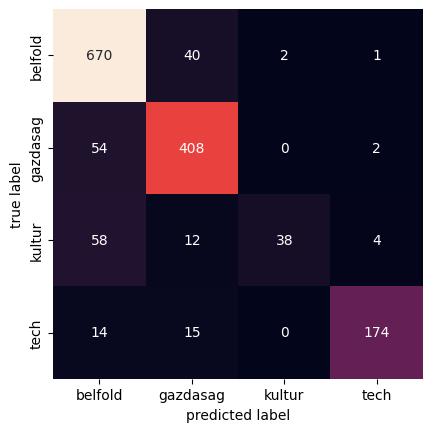

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_   #list(set(y_test_pred))
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels = labels)
plt.ylabel('true label')
plt.xlabel('predicted label');

#TF-IDF (haladó téma)
A TF-IDF (Term Frequency – Inverse Document Frequency) egy olyan statisztikai mutató, amely azt méri, hogy egy szó mennyire fontos egy adott dokumentumban egy teljes dokumentumgyűjteményhez (korpuszhoz) viszonyítva.


Az információkeresésben a tf–idf, a gyakoriság–inverz dokumentumgyakoriság rövidítése, egy numerikus statisztika, amelynek célja, hogy tükrözze, mennyire fontos egy szó egy gyűjteményben vagy korpuszban lévő dokumentum számára.

In [ ]:
lines_fruits = [
    'I like apples',
    'I like oranges',
    'I like pears',
]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(token_pattern=r'\w+')

x = vec.fit_transform(lines_fruits)

count_feature_array = vec.get_feature_names_out()
x.toarray(order='F') #vektorok
pd.DataFrame(x.todense(),columns=count_feature_array)

,apples,i,like,oranges,pears
0,0.767495,0.453295,0.453295,0.000000,0.000000
1,0.000000,0.453295,0.453295,0.767495,0.000000
2,0.000000,0.453295,0.453295,0.000000,0.767495


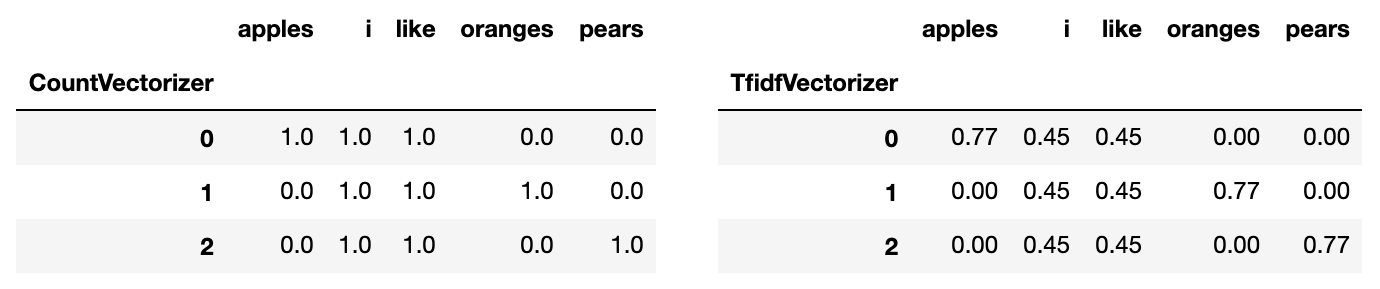
Mint látható, a CountVectorizerrel ellentétben a TfidfVectorizer nem minden szót kezel egyformán. Nagyobb hangsúlyt kapott a gyümölcsök neve a többi, kevésbé informatív szóhoz képest, amelyek történetesen mindhárom mondatban előfordultak.

Mind a CountVectorizer, mind aTfidfVectorizer rendelkezik egy stop_words nevű paraméterrel. Ezzel megadhatók a figyelmen kívül hagyandó tokenek. Megadhatja a kevésbé informatív szavak saját listáját, mint például az a, an és the. Megadhatja az englishkeyword paramétert is az angol nyelvben gyakori stop szavak megadásához. Mindezek után fontos megjegyezni, hogy egyes szavak informatívak lehetnek az egyik feladathoz, de egy másikhoz nem. Továbbá az IDF általában automatikusan elvégzi azt, amire szüksége van, és alacsony súlyt ad a nem informatív szavaknak. Ezért általában nem szoktam manuálisan eltávolítani a stop szavakat, ehelyett inkább olyan dolgokat próbálok ki, mint a TfidfVectorizer, a feature selection és a regularizationfirst.

Az eredeti felhasználási esetén kívül a TfidfVectorizer-t általában szövegosztályozás előfeldolgozási lépésként használják. Mindazonáltal általában jó eredményeket ad, amikor hosszabb dokumentumokat kell osztályozni. Rövid dokumentumok esetén zajos átalakítást eredményezhet, és ilyen esetekben tanácsos a CountVectorizer-t kipróbálni.

Egy egyszerű keresőmotorban, amikor valaki beír egy lekérdezést, azt a TF-IDF segítségével ugyanabba a vektortérbe konvertálja, ahol az összes keresendő dokumentum létezik. Miután a keresési lekérdezés és a dokumentumok vektorokként léteznek ugyanabban a térben, egy egyszerű távolságmérő, például a koszinusz távolság segítségével meg lehet találni a lekérdezéshez legközelebbi dokumentumokat. A modern keresőmotorok eltérnek ettől az alapötlettől, de ez egy jó alap az információkeresés megértéséhez.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1,3))

x_train_tfidf = vec.fit_transform(X_train)
x_test_tfidf = vec.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB(fit_prior=True)
clf_tfidf.fit(x_train_tfidf, y_train)
y_test_pred_tfidf = clf_tfidf.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred_tfidf) #
print(report)

              precision    recall  f1-score   support

     belfold       0.58      1.00      0.73       713
    gazdasag       0.92      0.53      0.67       464
      kultur       0.00      0.00      0.00       112
        tech       1.00      0.00      0.01       203

    accuracy                           0.64      1492
   macro avg       0.63      0.38      0.35      1492
weighted avg       0.70      0.64      0.56      1492



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Osztályozás logisztikus regresszióval
sokkal lassabb!!!

In [ ]:
#from sklearn.linear_model import LogisticRegression


#clf = SGDClassifier(loss='log', max_iter=10000, class_weight='balanced')
#clflr = LogisticRegression(max_iter=10000, class_weight=None)

#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

#clflr.fit(x_train, y_train)
#y_test_pred_lr = clflr.predict(x_test)

In [ ]:
#report = classification_report(y_test, y_test_pred_lr) #
#print(report)

#Pipeline és Gridsearch alkalmazása

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline(steps=[
    ('CountVectorizer', CountVectorizer()),
    ('MultinomialNB', MultinomialNB())]
)

GaussianNB → Ha folyamatos jellemzőkkel rendelkezik.

CategoricalNB → Ha kategorikus adatokkal rendelkezik.

MultinomialNB → Szöveges adatokra alkalmazva.


In [ ]:
param_grid = {
    'CountVectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'MultinomialNB__alpha': [0.1, 1], #additív simításhoz tartozó paraméter
    'MultinomialNB__fit_prior': [True, False], #Az osztály előzetes valószínűségeinek megtanulása vagy sem. Ha hamis, akkor egyenletes előfeltevést használunk.
}

In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid, scoring='precision_macro', n_jobs=-1)
search.fit(X_train, y_train) # nagy X az eredeti szöveges adatokat jelenti
print(search.best_params_)

{'CountVectorizer__ngram_range': (1, 2), 'MultinomialNB__alpha': 0.1, 'MultinomialNB__fit_prior': True}


In [ ]:
y_test_pred = search.predict(X_test) # a legjobb modellt használjuk

In [ ]:
report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

     belfold       0.88      0.94      0.91       713
    gazdasag       0.86      0.89      0.88       464
      kultur       0.98      0.46      0.62       112
        tech       0.94      0.90      0.92       203

    accuracy                           0.88      1492
   macro avg       0.91      0.80      0.83      1492
weighted avg       0.89      0.88      0.88      1492



#Mikor használjuk a Naive Bayes-t
Mivel a naiv Bayes-osztályozók szigorú feltételezéseket tesznek az adatokról, általában nem fognak olyan jól teljesíteni, mint egy bonyolultabb modell. Ennek ellenére számos előnyük van:

* Rendkívül gyorsak mind a képzés, mind az előrejelzés során.

* Egyszerű valószínűségi előrejelzést biztosítanak.

* Gyakran nagyon könnyen értelmezhetőek
* Nagyon kevés (ha van egyáltalán) hangolható paraméterük.

Ezek az előnyök azt jelentik, hogy a naiv Bayes-osztályozó gyakran jó választás kezdeti alapszintű osztályozásként.

Ha megfelelően teljesít, akkor gratulálunk: egy nagyon gyors, jól értelmezhető osztályozóval rendelkezik a problémájához. Ha nem teljesít jól, akkor elkezdheti a kifinomultabb modellek feltárását, némi alapismeret birtokában arról, hogy ezeknek milyen jól kell teljesíteniük.

A Naive Bayes osztályozók különösen jól teljesítenek a következő helyzetek valamelyikében:

* Amikor a naiv feltételezések valóban megfelelnek az adatoknak (a gyakorlatban nagyon ritka).
* Nagyon jól elkülönített kategóriák esetén, amikor a modell komplexitása kevésbé fontos.
* Nagyon nagy dimenziójú adatok esetén, amikor a modell komplexitása kevésbé fontos.

Az utolsó két pont látszólag különálló, de valójában összefüggnek: ahogy nő az adathalmaz dimenziója, sokkal kevésbé valószínű, hogy két pont közel van egymáshoz (végül is minden egyes dimenzióban közel kell lenniük egymáshoz ahhoz, hogy összességében közel legyenek egymáshoz). Ez azt jelenti, hogy a nagy dimenziókban lévő klaszterek átlagosan jobban elkülönülnek egymástól, mint az alacsony dimenziókban lévő klaszterek, feltéve, hogy az új dimenziók valóban információt adnak hozzá. Emiatt az olyan egyszerű osztályozók, mint a naiv Bayes, a dimenzionalitás növekedésével általában ugyanolyan jól vagy jobban működnek, mint a bonyolultabb osztályozók: ha elegendő adat áll rendelkezésre, még egy egyszerű modell is nagyon erős lehet.

#Házi feladat
https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/spam.csv

Készítsen a spam.csv segítségével spam detektort! A modell NaiveBayes alapú legyen, CountVectorizer segítségével alakítsa át szöveget. Pipeline és Gridsearch segítségével végezzen hiperparaméter hangolást! Hiper paraméterek:
CountVectorizer esetén: ngram_range, analyzer, MultinomialNB esetén: alpha, fit_prior! A modellt classification_report segítségével értékelje!
Készítsen hozzá zavartsági (confusion) mátrixot is!
Beküldési határidő: 2025.11.24!